In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spring_rods_system_setup import SpringRodsSystemSetup
from spring_rods_system_solver import SpringRodsSystemSolver

In [2]:
plt.rcParams.update({
    'axes.grid': True,
    'figure.facecolor': 'white'
})

# Experiments on spring compression

In [3]:
model = SpringRodsSystemSetup(
    interval=(-1, 1),
    spring_len=1,
    step_size=1/16,
    material_const=(1, 1),
    spring_const=(1, 1),
    body_forces=lambda x: np.where(x < 0, 1, 0)
)
solver = SpringRodsSystemSolver(model)
right_rod_beg = model.domain[0].size

In [4]:
sprint_const = [(i, 1) for i in np.linspace(0.01, 2, 100)]

spring_len_results = []
left_end_results = []
right_end_results = []

for idx, const in enumerate(sprint_const, 1):
    model.set_spring_const(const)
    displacements = solver()

    left_end_results.append(displacements[right_rod_beg - 1])
    right_end_results.append(displacements[right_rod_beg])
    spring_len = model.spring_len - displacements[right_rod_beg - 1] + displacements[right_rod_beg]
    spring_len_results.append(spring_len)

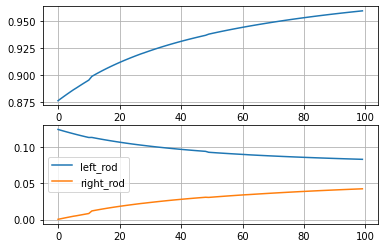

In [5]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(spring_len_results)

axs[1].plot(left_end_results, label='left_rod')
axs[1].plot(right_end_results, label='right_rod')
axs[1].legend()

# Experiments on spring extension

In [6]:
model = SpringRodsSystemSetup(
    interval=(-1, 1),
    spring_len=1,
    step_size=1/16,
    material_const=(1, 1),
    spring_const=(1, 1),
    body_forces=lambda x: np.where(x < 0, -1, 0)
)
solver = SpringRodsSystemSolver(model)
right_rod_beg = model.domain[0].size

In [7]:
sprint_const = [(1, i) for i in np.linspace(0.01, 2, 1000)]

spring_len_results = []
left_end_results = []
right_end_results = []

for idx, const in enumerate(sprint_const, 1):
    model.set_spring_const(const)
    displacements = solver()

    left_end_results.append(displacements[right_rod_beg - 1])
    right_end_results.append(displacements[right_rod_beg])
    spring_len = model.spring_len - displacements[right_rod_beg - 1] + displacements[right_rod_beg]
    spring_len_results.append(spring_len)

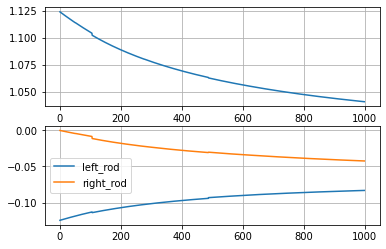

In [8]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(spring_len_results)

axs[1].plot(left_end_results, label='left_rod')
axs[1].plot(right_end_results, label='right_rod')
axs[1].legend()

# Spring length diagram

In [9]:
model = SpringRodsSystemSetup(
    interval=(-1, 1),
    spring_len=1,
    step_size=1/16,
    material_const=(1, 1),
    spring_const=(1, 1),
    body_forces=lambda x: np.where(x < 0, -1, 0)
)
solver = SpringRodsSystemSolver(model)
right_rod_beg = model.domain[0].size

In [10]:
N, M = 10, 10
sprint_const = [(i, i) for i in np.linspace(0.01, 2, N)]
body_forces = np.linspace(-2, 2, M)

def create_force_function(force: float):
    return lambda x: np.where(x < 0, force, 0)

spring_len_results = np.empty((N, M))

for m, force_param in enumerate(body_forces):
    force_func = create_force_function(force_param)
    for n, const in enumerate(sprint_const):
        model.set_spring_const(const)
        model.set_body_forces(force_func)
        displacements = solver()

        spring_len = model.spring_len - displacements[right_rod_beg - 1] + displacements[right_rod_beg]
        spring_len_results[n, m] = spring_len

/tmp/ipykernel_14613/4123902523.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


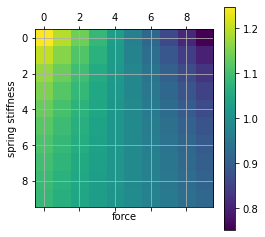

In [11]:
plt.matshow(spring_len_results)
plt.xlabel('force')
plt.ylabel('spring stiffness')
plt.colorbar()